## 1. Introduction

   This capstone project is determining if consumer products, such as wet wipes, cleansing clothes, toilet paper etc., are save to flush based on their raw material composition. The importance of determining what a product is exactly made of helps manufactures label their products correctly. When a product that is falsely labelled as ‘flushable’ is flushed, it can potentially release micro-plastics into the environment. Which can eventually infiltrate our food chain.


   The data I will be working with is privately sourced from a university professor’s own project. I will be comparing the IR scans of 101 consumers products to the IR scans of 6 raw materials that typically make up wipes such as these. The IR scans records the thermal heat emitted as a percent transmittance at a certain wave length.
    
    
The 6 types of raw materials are:

•	15% rayon & 85% softwood

•	15% rayon & 85% hardwood

•	20% lyocell & 80% softwood

•	35% rayon & 65% softwood

•	Lyocell

•	Rayon


Anything with wood in it would be considered soft, so it will be able to easily break apart when it is flushed. Anything with lyocell and rayon is considered more tough and durable. So, it can stay fully intact when flushed. By determining how much of each raw material makes up product, I can conclude if a product is flushable or not. For example, if product 1 has 50% or more of lyocell, then product 1 would be unsafe to flush. 

## 2. Importing Data

Since this is a private data set, I will first have to pre-process all the data and create usable data frames before I can do any analysis. I will be importing CSV files for the percent transmittance for each product and the 6 raw materials, the categories and labels of the product, along with its' pass/fail test results of the physical test. As well as the results of the fibre analysis for 20 of the 101 products.

### 2.1 Files for 101 products 

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#importing all 101 csv files at once
#renaming the columns and droping rows 0 to 3 and reseting the index 
#since the values in the files are in a string format, convert them into numbers

file_names = [f for f in os.listdir('Excel files for All 101 Products/') if '.csv' in f]

products = []
for file in file_names:
    file_1 = pd.read_csv(f'Excel files for All 101 Products/{file}').rename(columns = {"Wavenumber":f'Product{file[:-4]}','XLabel':'WaveNumber'})
    file_1 = file_1.drop([0,1,2,3]).reset_index()
    file_1 = file_1.drop(columns='index')
    file_1['WaveNumber'] = pd.to_numeric(file_1.WaveNumber)
    file_1[f'Product{file[:-4]}'] = pd.to_numeric(file_1[f'Product{file[:-4]}'])
    products.append(file_1)    

In [5]:
#merging every array of list to dataframe a
#naming it a random while I clean up the dataframe and reanaming it after  
a = products[0]

for table in products[1:]:
    a = a.merge(table, how='outer', on='WaveNumber')
a.head(3)

,WaveNumber,Product1,Product10,Product100,Product101,Product11,Product12,Product13,Product14,Product15,...,Product90,Product91,Product92,Product93,Product94,Product95,Product96,Product97,Product98,Product99
0,650.612131,77.123386,91.566304,NaN,NaN,87.054968,90.281864,85.256012,92.160627,84.095896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,652.476349,76.216194,91.547435,NaN,NaN,87.801624,90.675510,85.125670,92.098919,83.028127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,654.340568,75.684007,90.859578,NaN,NaN,86.924638,90.802800,85.265524,92.003469,83.283209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#drop product 32 and 33 with color since it's composed of two parts, not needed for the analysis
#and renaming the products without the colour 
pd.set_option('display.max_columns', 2700)

a = a.drop(columns=['Product32 green part','Product33 with blue'])
a = a.rename(columns={'Product33 without blue':'Product33'})
a

,WaveNumber,Product1,Product10,Product100,Product101,Product11,Product12,Product13,Product14,Product15,Product16,Product17,Product18,Product19,Product2,Product20,Product21,Product22,Product23,Product24,Product25,Product26,Product27,Product28,Product29,Product3,Product30,Product31,Product32,Product33,Product34,Product35,Product36,Product37,Product38,Product39,Product4,Product40,Product41,Product42,Product43,Product44,Product45,Product46,Product47,Product48,Product49,Product5,Product50,Product51,Product52,Product53,Product54,Product55,Product56,Product57,Product58,Product59,Product6,Product60,Product61,Product62,Product63,Product64,Product65,Product66,Product67,Product68,Product69,Product7,Product70,Product71,Product72,Product73,Product74,Product75,Product76,Product77,Product78,Product79,Product8,Product80,Product81,Product82,Product83,Product84,Product85,Product86,Product87,Product88,Product89,Product9,Product90,Product91,Product92,Product93,Product94,Product95,Product96,Product97,Product98,Product99
0,650.612131,77.123386,91.566304,NaN,NaN,87.054968,90.281864,85.256012,92.160627,84.095896,87.881924,87.548344,82.697425,74.923794,86.171471,91.351713,84.295019,86.185708,87.039077,83.546804,79.350525,76.912540,82.407762,79.427121,81.274173,86.543272,93.683208,76.238876,90.853450,86.746437,84.365895,92.074012,69.669761,86.553805,72.329687,90.396046,91.304479,77.438166,78.949688,78.965216,87.904289,79.890592,83.174954,93.381726,87.831448,80.478285,91.113989,85.554451,84.956152,82.806460,83.962102,88.226963,81.096447,86.500707,91.147517,86.408665,81.318819,80.819128,90.746960,80.961192,85.189862,81.078321,77.903454,84.212531,86.953111,79.312684,87.079913,84.479216,80.801548,91.994644,86.986262,78.575967,82.535870,50.024267,NaN,49.197350,NaN,NaN,NaN,NaN,91.684144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.911074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,652.476349,76.216194,91.547435,NaN,NaN,87.801624,90.675510,85.125670,92.098919,83.028127,88.331611,86.243333,83.342222,75.640707,86.447702,90.853702,83.752494,85.962061,87.674514,84.248177,78.657874,76.805908,82.712029,80.314493,80.539140,87.481337,93.231614,76.775539,91.106199,85.339151,84.206138,91.400011,68.094952,86.216349,72.510734,90.099100,91.038255,77.389701,79.416420,79.175233,87.825890,80.329813,83.424522,93.956401,87.557965,80.138578,91.979993,85.838045,84.983664,82.387542,83.610891,89.112352,80.428324,85.607544,92.188886,87.816315,82.532916,81.475975,90.418666,80.773820,85.057437,81.467235,78.418638,84.797048,85.666441,79.766480,85.348677,84.085813,80.599386,91.509881,87.437728,78.780978,82.962365,50.441435,NaN,48.350637,NaN,NaN,NaN,NaN,91.429307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.396547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,654.340568,75.684007,90.859578,NaN,NaN,86.924638,90.802800,85.265524,92.003469,83.283209,87.224585,84.918304,83.416113,75.743230,86.769670,90.820295,84.182877,86.214471,87.816632,84.489248,78.359803,77.522103,82.758440,80.045258,79.067891,88.015754,93.823206,77.592927,91.076521,83.738500,83.932058,90.948520,68.020841,86.914621,72.210727,90.421113,91.467581,78.156495,79.756905,78.706354,89.202358,80.218508,83.778397,93.873299,87.324027,80.214334,91.391515,85.922817,84.621940,84.227497,83.660953,89.502387,80.009633,85.490204,93.385566,87.694127,83.403462,81.818752,90.255860,80.315843,85.006077,81.284555,78.613453,84.534335,85.814060,80.331918,84.841127,84.739354,80.196085,91.422697,86.404008,79.484154,83.010900,50.452795,NaN,48.526811,NaN,NaN,NaN,NaN,90.917771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.110637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656.204786,74.681394,91.487125,NaN,NaN,86.668116,90.700173,85.236198,91.367665,83.961777,87.741779,85.505138,82.903563,75.662816,86.418133,90.421543,84.080107,86.273139,87.157869,84.175381,79.153898,77.813773,82.796402,79.107547,79.449977,87.555846,94.310689,76.705135,90.704593,83.627854,83.688508,91.680277,69.299294,87.056513,72.026360,90.356530,91.850697,78.761463,79.310322,78.657930,88.876450,7

There are many NaN values once all the products are merged into one data frame. Let us sort this data frame by the 'WaveNumber' column so it shows us every wave number for every product.

In [7]:
sorted_wn = a.sort_values(by=['WaveNumber'])
sorted_wn.head(3)

,WaveNumber,Product1,Product10,Product100,Product101,Product11,Product12,Product13,Product14,Product15,Product16,Product17,Product18,Product19,Product2,Product20,Product21,Product22,Product23,Product24,Product25,Product26,Product27,Product28,Product29,Product3,Product30,Product31,Product32,Product33,Product34,Product35,Product36,Product37,Product38,Product39,Product4,Product40,Product41,Product42,Product43,Product44,Product45,Product46,Product47,Product48,Product49,Product5,Product50,Product51,Product52,Product53,Product54,Product55,Product56,Product57,Product58,Product59,Product6,Product60,Product61,Product62,Product63,Product64,Product65,Product66,Product67,Product68,Product69,Product7,Product70,Product71,Product72,Product73,Product74,Product75,Product76,Product77,Product78,Product79,Product8,Product80,Product81,Product82,Product83,Product84,Product85,Product86,Product87,Product88,Product89,Product9,Product90,Product91,Product92,Product93,Product94,Product95,Product96,Product97,Product98,Product99
1798,648.556784,NaN,NaN,82.931840,78.027627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.084532,NaN,81.276655,80.146485,78.308712,73.921544,NaN,81.053093,81.713859,80.071018,86.316144,79.910297,79.727440,84.241794,81.868052,59.481435,53.366154,NaN,62.437051,72.744250,70.475768,75.717117,73.627400,75.028808,79.781249,81.618817,77.154093,79.321625
0,650.612131,77.123386,91.566304,NaN,NaN,87.054968,90.281864,85.256012,92.160627,84.095896,87.881924,87.548344,82.697425,74.923794,86.171471,91.351713,84.295019,86.185708,87.039077,83.546804,79.350525,76.91254,82.407762,79.427121,81.274173,86.543272,93.683208,76.238876,90.85345,86.746437,84.365895,92.074012,69.669761,86.553805,72.329687,90.396046,91.304479,77.438166,78.949688,78.965216,87.904289,79.890592,83.174954,93.381726,87.831448,80.478285,91.113989,85.554451,84.956152,82.80646,83.962102,88.226963,81.096447,86.500707,91.147517,86.408665,81.318819,80.819128,90.74696,80.961192,85.189862,81.078321,77.903454,84.212531,86.953111,79.312684,87.079913,84.479216,80.801548,91.994644,86.986262,78.575967,82.53587,50.024267,NaN,49.19735,NaN,NaN,NaN,NaN,91.684144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.911074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1799,652.284122,NaN,NaN,82.936868,78.135728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.739338,NaN,81.020078,80.141215,78.442593,73.826340,NaN,80.720694,81.504565,79.991079,85.979358,79.593584,79.558162,84.463934,81.633375,59.837020,53.542900,NaN,62.191823,72.292094,70.116430,75.278912,73.428595,74.816253,79.890883,81.586647,76.736785,79.074409


In [8]:
#checking the amount of NaNs
sorted_wn.isnull().sum()

WaveNumber       0
Product1       902
Product10      902
Product100    1800
Product101    1800
Product11      902
Product12      902
Product13      902
Product14      902
Product15      902
Product16      902
Product17      902
Product18      902
Product19      902
Product2       902
Product20      902
Product21      902
Product22      902
Product23      902
Product24      902
Product25      902
Product26      902
Product27      902
Product28      902
Product29      902
Product3       902
Product30      902
Product31      902
Product32      902
Product33      902
              ... 
Product72      902
Product73      902
Product74     1800
Product75      902
Product76     1800
Product77     1800
Product78     1800
Product79     1800
Product8       902
Product80     1800
Product81     1800
Product82     1800
Product83     1800
Product84     1800
Product85     1800
Product86     1800
Product87     1800
Product88     1800
Product89     1800
Product9       902
Product90     1800
Product91   

Replacing all the NaN values with interpolated values since many of the NaNs are inbetween values. I didn't use forwards or backwards fill since many of the values would become the same for different wave numbers. This not would be the case in real life when using the IR scan since it can pick up on the minor differences.

In [9]:
sorted_products = sorted_wn.interpolate() 
sorted_products.head()

,WaveNumber,Product1,Product10,Product100,Product101,Product11,Product12,Product13,Product14,Product15,Product16,Product17,Product18,Product19,Product2,Product20,Product21,Product22,Product23,Product24,Product25,Product26,Product27,Product28,Product29,Product3,Product30,Product31,Product32,Product33,Product34,Product35,Product36,Product37,Product38,Product39,Product4,Product40,Product41,Product42,Product43,Product44,Product45,Product46,Product47,Product48,Product49,Product5,Product50,Product51,Product52,Product53,Product54,Product55,Product56,Product57,Product58,Product59,Product6,Product60,Product61,Product62,Product63,Product64,Product65,Product66,Product67,Product68,Product69,Product7,Product70,Product71,Product72,Product73,Product74,Product75,Product76,Product77,Product78,Product79,Product8,Product80,Product81,Product82,Product83,Product84,Product85,Product86,Product87,Product88,Product89,Product9,Product90,Product91,Product92,Product93,Product94,Product95,Product96,Product97,Product98,Product99
1798,648.556784,NaN,NaN,82.931840,78.027627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.084532,NaN,81.276655,80.146485,78.308712,73.921544,NaN,81.053093,81.713859,80.071018,86.316144,79.910297,79.727440,84.241794,81.868052,59.481435,53.366154,NaN,62.437051,72.744250,70.475768,75.717117,73.627400,75.028808,79.781249,81.618817,77.154093,79.321625
0,650.612131,77.123386,91.566304,82.934354,78.081677,87.054968,90.281864,85.256012,92.160627,84.095896,87.881924,87.548344,82.697425,74.923794,86.171471,91.351713,84.295019,86.185708,87.039077,83.546804,79.350525,76.912540,82.407762,79.427121,81.274173,86.543272,93.683208,76.238876,90.853450,86.746437,84.365895,92.074012,69.669761,86.553805,72.329687,90.396046,91.304479,77.438166,78.949688,78.965216,87.904289,79.890592,83.174954,93.381726,87.831448,80.478285,91.113989,85.554451,84.956152,82.806460,83.962102,88.226963,81.096447,86.500707,91.147517,86.408665,81.318819,80.819128,90.746960,80.961192,85.189862,81.078321,77.903454,84.212531,86.953111,79.312684,87.079913,84.479216,80.801548,91.994644,86.986262,78.575967,82.535870,50.024267,82.911935,49.197350,81.148367,80.143850,78.375653,73.873942,91.684144,80.886893,81.609212,80.031048,86.147751,79.751940,79.642801,84.352864,81.750714,59.659228,53.454527,85.911074,62.314437,72.518172,70.296099,75.498015,73.527997,74.922530,79.836066,81.602732,76.945439,79.198017
1799,652.284122,76.669790,91.556870,82.936868,78.135728,87.428296,90.478687,85.190841,92.129773,83.562011,88.106767,86.895838,83.019824,75.282251,86.309586,91.102708,84.023756,86.073884,87.356796,83.897491,79.004199,76.859224,82.559896,79.870807,80.906656,87.012304,93.457411,76.507207,90.979825,86.042794,84.286016,91.737011,68.882357,86.385077,72.420210,90.247573,91.171367,77.413934,79.183054,79.070224,87.865090,80.110202,83.299738,93.669063,87.694706,80.308432,91.546991,85.696248,84.969908,82.597001,83.786496,88.669657,80.762385,86.054125,91.668202,87.112490,81.925867,81.147552,90.582813,80.867506,85.123649,81.272778,78.161046,84.504790,86.309776,79.539582,86.214295,84.282515,80.700467,91.752263,87.211995,78.678472,82.749117,50.232851,82.739338,48.773994,81.020078,80.141215,78.442593,73.826340,91.556725,80.720694,81.504565,79.991079,85.979358,79.593584,79.558162,84.463934,81.633375,59.837020,53.542900,86.153810,62.191823,72.292094,70.116430,75.278912,73.428595,74.816253,79.890883,81.586647,76.736785,79.074409
1,652.476349,76.216194,91.547435,82.876539,78.025483,87.801624,90.675510,85.125670,92.098919,83.028127,88.331611,86.243333,83.342222,75.640707,86.447702,90.853702,83.752494,85.962061,87.674514,84.248177,78.657874,76.805908,82.712029,80.314493,80.539140,87.481337,93.231614,76.775539,91.106199,85.339151,84.206138,91.400011,68.094952,86.216349,72.510734,9

In [10]:
#dropping row '1798' since the pure composition is not measured on wave number 650.612131
sorted_products = sorted_products.drop(sorted_products.index[0]) 
sorted_products.head()

,WaveNumber,Product1,Product10,Product100,Product101,Product11,Product12,Product13,Product14,Product15,Product16,Product17,Product18,Product19,Product2,Product20,Product21,Product22,Product23,Product24,Product25,Product26,Product27,Product28,Product29,Product3,Product30,Product31,Product32,Product33,Product34,Product35,Product36,Product37,Product38,Product39,Product4,Product40,Product41,Product42,Product43,Product44,Product45,Product46,Product47,Product48,Product49,Product5,Product50,Product51,Product52,Product53,Product54,Product55,Product56,Product57,Product58,Product59,Product6,Product60,Product61,Product62,Product63,Product64,Product65,Product66,Product67,Product68,Product69,Product7,Product70,Product71,Product72,Product73,Product74,Product75,Product76,Product77,Product78,Product79,Product8,Product80,Product81,Product82,Product83,Product84,Product85,Product86,Product87,Product88,Product89,Product9,Product90,Product91,Product92,Product93,Product94,Product95,Product96,Product97,Product98,Product99
0,650.612131,77.123386,91.566304,82.934354,78.081677,87.054968,90.281864,85.256012,92.160627,84.095896,87.881924,87.548344,82.697425,74.923794,86.171471,91.351713,84.295019,86.185708,87.039077,83.546804,79.350525,76.912540,82.407762,79.427121,81.274173,86.543272,93.683208,76.238876,90.853450,86.746437,84.365895,92.074012,69.669761,86.553805,72.329687,90.396046,91.304479,77.438166,78.949688,78.965216,87.904289,79.890592,83.174954,93.381726,87.831448,80.478285,91.113989,85.554451,84.956152,82.806460,83.962102,88.226963,81.096447,86.500707,91.147517,86.408665,81.318819,80.819128,90.746960,80.961192,85.189862,81.078321,77.903454,84.212531,86.953111,79.312684,87.079913,84.479216,80.801548,91.994644,86.986262,78.575967,82.535870,50.024267,82.911935,49.197350,81.148367,80.143850,78.375653,73.873942,91.684144,80.886893,81.609212,80.031048,86.147751,79.751940,79.642801,84.352864,81.750714,59.659228,53.454527,85.911074,62.314437,72.518172,70.296099,75.498015,73.527997,74.922530,79.836066,81.602732,76.945439,79.198017
1799,652.284122,76.669790,91.556870,82.936868,78.135728,87.428296,90.478687,85.190841,92.129773,83.562011,88.106767,86.895838,83.019824,75.282251,86.309586,91.102708,84.023756,86.073884,87.356796,83.897491,79.004199,76.859224,82.559896,79.870807,80.906656,87.012304,93.457411,76.507207,90.979825,86.042794,84.286016,91.737011,68.882357,86.385077,72.420210,90.247573,91.171367,77.413934,79.183054,79.070224,87.865090,80.110202,83.299738,93.669063,87.694706,80.308432,91.546991,85.696248,84.969908,82.597001,83.786496,88.669657,80.762385,86.054125,91.668202,87.112490,81.925867,81.147552,90.582813,80.867506,85.123649,81.272778,78.161046,84.504790,86.309776,79.539582,86.214295,84.282515,80.700467,91.752263,87.211995,78.678472,82.749117,50.232851,82.739338,48.773994,81.020078,80.141215,78.442593,73.826340,91.556725,80.720694,81.504565,79.991079,85.979358,79.593584,79.558162,84.463934,81.633375,59.837020,53.542900,86.153810,62.191823,72.292094,70.116430,75.278912,73.428595,74.816253,79.890883,81.586647,76.736785,79.074409
1,652.476349,76.216194,91.547435,82.876539,78.025483,87.801624,90.675510,85.125670,92.098919,83.028127,88.331611,86.243333,83.342222,75.640707,86.447702,90.853702,83.752494,85.962061,87.674514,84.248177,78.657874,76.805908,82.712029,80.314493,80.539140,87.481337,93.231614,76.775539,91.106199,85.339151,84.206138,91.400011,68.094952,86.216349,72.510734,90.099100,91.038255,77.389701,79.416420,79.175233,87.825890,80.329813,83.424522,93.956401,87.557965,80.138578,91.979993,85.838045,84.983664,82.387542,83.610891,89.112352,80.428324,85.607544,92.188886,87.816315,82.532916,81.475975,90.418666,80.773820,85.057437,81.467235,78.418638,84.797048,85.666441,79.766480,85.348677,84.085813,80.599386,91.509881,87.437728,78.780978,82.962365,50.441435,82.664241,48.350637,80.935308,80.067921,78.332818,73.736147,91.429307,80.615593,81.373169,79.811577,85.957814,79.450343,79.521328,84.456706,81.588394,59.989445,53.681447,86.396547,62.177156,72.

In [11]:
#checking for NaNs to see if the interpolation worked
sorted_products.isnull().sum() 

WaveNumber    0
Product1      0
Product10     0
Product100    0
Product101    0
Product11     0
Product12     0
Product13     0
Product14     0
Product15     0
Product16     0
Product17     0
Product18     0
Product19     0
Product2      0
Product20     0
Product21     0
Product22     0
Product23     0
Product24     0
Product25     0
Product26     0
Product27     0
Product28     0
Product29     0
Product3      0
Product30     0
Product31     0
Product32     0
Product33     0
             ..
Product72     0
Product73     0
Product74     0
Product75     0
Product76     0
Product77     0
Product78     0
Product79     0
Product8      0
Product80     0
Product81     0
Product82     0
Product83     0
Product84     0
Product85     0
Product86     0
Product87     0
Product88     0
Product89     0
Product9      0
Product90     0
Product91     0
Product92     0
Product93     0
Product94     0
Product95     0
Product96     0
Product97     0
Product98     0
Product99     0
Length: 102, dtype: int6

### 2.2 Files for Manufacture Label of Products and Product Type

In [12]:
pd.options.display.max_rows = 171

In [13]:
b = pd.read_csv('Consumer product data.csv')
b

,Product #,Product Category,Sub-Category,Labelled Flushable?
0,1.0,Baby Wipes,Flushable,Yes
1,2.0,Baby Wipes,Flushable,Yes
2,3.0,Baby Wipes,NaN,No
3,4.0,Baby Wipes,NaN,No
4,5.0,Baby Wipes,NaN,No
5,6.0,Baby Wipes,NaN,No
6,7.0,Baby Wipes,NaN,No
7,8.0,Baby Wipes,NaN,No
8,9.0,Baby Wipes,NaN,No
9,10.0,Baby Wipes,NaN,No


In [14]:
b = b.drop(columns=['Sub-Category'])
b = b.rename(columns={'Labelled Flushable?':'Labelled Flushable', 'Product #': 'Product'})

# dropping extra rows with NaN values at bottom of data frame
b = b[:-61]

#dropping nan rows used as seperaters between the product category & reset the index
b = b.drop(b.index[[18,30,35,50,56,89,93,97,104]]).reset_index(drop=True)

#rename to an approiate name 
product_label = b
product_label

,Product,Product Category,Labelled Flushable
0,1.0,Baby Wipes,Yes
1,2.0,Baby Wipes,Yes
2,3.0,Baby Wipes,No
3,4.0,Baby Wipes,No
4,5.0,Baby Wipes,No
5,6.0,Baby Wipes,No
6,7.0,Baby Wipes,No
7,8.0,Baby Wipes,No
8,9.0,Baby Wipes,No
9,10.0,Baby Wipes,No


### 2.3 Files for Pass/Fail Flushability Results of Products

In [15]:
c = pd.read_csv('Pass_Fail of 101 Products.csv')
c

,Product #,Product Category,Pass/Fail,Pass Rate
0,1.0,Baby Wipes,Fail,0.00
1,2.0,Baby Wipes,Fail,0.00
2,3.0,Baby Wipes,Fail,0.00
3,4.0,Baby Wipes,Fail,0.00
4,5.0,Baby Wipes,Fail,0.00
5,6.0,Baby Wipes,Fail,0.00
6,7.0,Baby Wipes,Fail,0.00
7,8.0,Baby Wipes,Fail,0.00
8,9.0,Baby Wipes,Fail,0.00
9,10.0,Baby Wipes,Fail,0.00


In [16]:
c = c.drop(columns=['Product Category'])
c = c.rename(columns={'Product #':'Product'})

#dropping nan rows used as seperaters between the product category & reset the index
c = c.drop(c.index[[18,30,35,50,56,89,93,97,104,110]]).reset_index(drop=True)
c

,Product,Pass/Fail,Pass Rate
0,1.0,Fail,0.00
1,2.0,Fail,0.00
2,3.0,Fail,0.00
3,4.0,Fail,0.00
4,5.0,Fail,0.00
5,6.0,Fail,0.00
6,7.0,Fail,0.00
7,8.0,Fail,0.00
8,9.0,Fail,0.00
9,10.0,Fail,0.00


In [17]:
#changing the values in column 'Pass Rate' with 0 and 1
#1 for pass and 0 for fail

for i in np.arange(0,101,1):
    if c.iloc[i][2] >= 50:
        c['Pass Rate'][i] = 1
    elif c.iloc[i][2] < 50:
        c['Pass Rate'][i] = 0

passfail_test = c         
passfail_test

C:\Users\Harshleen\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Harshleen\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Product,Pass/Fail,Pass Rate
0,1.0,Fail,0.0
1,2.0,Fail,0.0
2,3.0,Fail,0.0
3,4.0,Fail,0.0
4,5.0,Fail,0.0
5,6.0,Fail,0.0
6,7.0,Fail,0.0
7,8.0,Fail,0.0
8,9.0,Fail,0.0
9,10.0,Fail,0.0


### 2.4 Merging product_label and  passfail_test Data Frames

In [18]:
product_label = product_label.merge(passfail_test, how='inner', on='Product')
product_label = product_label.drop(columns=['Pass/Fail'])
product_label

,Product,Product Category,Labelled Flushable,Pass Rate
0,1.0,Baby Wipes,Yes,0.0
1,2.0,Baby Wipes,Yes,0.0
2,3.0,Baby Wipes,No,0.0
3,4.0,Baby Wipes,No,0.0
4,5.0,Baby Wipes,No,0.0
5,6.0,Baby Wipes,No,0.0
6,7.0,Baby Wipes,No,0.0
7,8.0,Baby Wipes,No,0.0
8,9.0,Baby Wipes,No,0.0
9,10.0,Baby Wipes,No,0.0


### 2.5 Files for Pure Composition

In [19]:
composition_names = [f for f in os.listdir('Pure Composition/Pure Composition/CSV files/') if '.csv' in f]

pure_comp = []

for composition in composition_names:
    composition_1 = pd.read_csv(f'Pure Composition/Pure Composition/CSV files/{composition}').rename(columns = {"Wavenumber":f'{composition[:-4]}','XLabel':'WaveNumber'})
    composition_1 = composition_1.drop([0,1,2,3]).reset_index()
    composition_1 = composition_1.drop(columns='index')
    composition_1['WaveNumber'] = pd.to_numeric(composition_1.WaveNumber)
    composition_1[f'{composition[:-4]}'] = pd.to_numeric(composition_1[f'{composition[:-4]}'])
    pure_comp.append(composition_1) 

In [20]:
#merging every array in list pure_comp to d to create a dataframe for every pure composition 
d = pure_comp[0]

for table in pure_comp[1:]:
    d = d.merge(table,how='outer', on='WaveNumber')
d

,WaveNumber,15_rayon_ 85_softwood,15_rayon_85_hardwood,20_lyocell_80_softwood,35_rayon_65_softwood,lyocell_1,lyocell_2,lyocell_3,rayon_1,rayon_2,rayon_3
0,650.612131,79.227840,85.421491,68.829563,82.304029,86.167511,83.749622,85.565564,44.769070,73.097509,59.116814
1,652.476349,79.795160,85.772351,68.331339,81.722157,86.229749,82.706847,85.467270,44.948508,73.479297,59.323568
2,654.340568,80.200500,87.450270,68.999422,81.350257,86.223920,82.956559,85.553161,44.325053,72.550817,60.464308
3,656.204786,78.951970,88.221001,69.911201,81.861329,86.875838,83.027323,86.272900,44.203356,72.718733,61.109491
4,658.069004,77.914234,87.060120,70.290681,82.870374,87.739392,82.777552,86.286552,44.591870,74.221939,60.749875
5,659.933222,77.980539,86.083736,69.598452,82.652326,87.483777,83.451770,85.815417,44.803718,74.105404,60.423557
6,661.797440,78.456800,86.295457,69.287866,81.982246,86.805378,83.506228,85.845844,45.070928,73.129754,60.812066
7,663.661658,79.406599,86.945512,69.835848,81.907509,86.181481,83.349970,86.226021,45.369493,73.063944,60.822880
8,665.525876,79.663313,87.445692,69.818486,82.383489,86.179852,83.596900,86.277549,45.919843,73.408298,60.900937
9,667.390095,78.939654,87.240165,69.305900,83.103207,86.818101,82.982227,85.764949,45.964574,73.259019,61.165742


In [21]:
#Lyocell and rayon was measure 3 times, so get average of these 3 columns and drop the individual columns

d['Lyocell Avg.'] = d[['lyocell_1', 'lyocell_2','lyocell_3']].mean(axis=1)
d['Rayon Avg.'] = d[['rayon_1', 'rayon_2','rayon_3']].mean(axis=1)
d = d.drop(columns=['lyocell_1', 'lyocell_2','lyocell_3','rayon_1', 'rayon_2','rayon_3'])
d

,WaveNumber,15_rayon_ 85_softwood,15_rayon_85_hardwood,20_lyocell_80_softwood,35_rayon_65_softwood,Lyocell Avg.,Rayon Avg.
0,650.612131,79.227840,85.421491,68.829563,82.304029,85.160899,58.994464
1,652.476349,79.795160,85.772351,68.331339,81.722157,84.801289,59.250458
2,654.340568,80.200500,87.450270,68.999422,81.350257,84.911213,59.113393
3,656.204786,78.951970,88.221001,69.911201,81.861329,85.392020,59.343860
4,658.069004,77.914234,87.060120,70.290681,82.870374,85.601165,59.854561
5,659.933222,77.980539,86.083736,69.598452,82.652326,85.583655,59.777560
6,661.797440,78.456800,86.295457,69.287866,81.982246,85.385817,59.670916
7,663.661658,79.406599,86.945512,69.835848,81.907509,85.252491,59.752106
8,665.525876,79.663313,87.445692,69.818486,82.383489,85.351434,60.076359
9,667.390095,78.939654,87.240165,69.305900,83.103207,85.188426,60.129778


### 2.6 Merging products and pure composition into one dataframe on matching wave numbers

In [22]:
products_pc = d.merge(sorted_products,how='inner', on='WaveNumber')
products_pc.head()

,WaveNumber,15_rayon_ 85_softwood,15_rayon_85_hardwood,20_lyocell_80_softwood,35_rayon_65_softwood,Lyocell Avg.,Rayon Avg.,Product1,Product10,Product100,Product101,Product11,Product12,Product13,Product14,Product15,Product16,Product17,Product18,Product19,Product2,Product20,Product21,Product22,Product23,Product24,Product25,Product26,Product27,Product28,Product29,Product3,Product30,Product31,Product32,Product33,Product34,Product35,Product36,Product37,Product38,Product39,Product4,Product40,Product41,Product42,Product43,Product44,Product45,Product46,Product47,Product48,Product49,Product5,Product50,Product51,Product52,Product53,Product54,Product55,Product56,Product57,Product58,Product59,Product6,Product60,Product61,Product62,Product63,Product64,Product65,Product66,Product67,Product68,Product69,Product7,Product70,Product71,Product72,Product73,Product74,Product75,Product76,Product77,Product78,Product79,Product8,Product80,Product81,Product82,Product83,Product84,Product85,Product86,Product87,Product88,Product89,Product9,Product90,Product91,Product92,Product93,Product94,Product95,Product96,Product97,Product98,Product99
0,650.612131,79.227840,85.421491,68.829563,82.304029,85.160899,58.994464,77.123386,91.566304,82.934354,78.081677,87.054968,90.281864,85.256012,92.160627,84.095896,87.881924,87.548344,82.697425,74.923794,86.171471,91.351713,84.295019,86.185708,87.039077,83.546804,79.350525,76.912540,82.407762,79.427121,81.274173,86.543272,93.683208,76.238876,90.853450,86.746437,84.365895,92.074012,69.669761,86.553805,72.329687,90.396046,91.304479,77.438166,78.949688,78.965216,87.904289,79.890592,83.174954,93.381726,87.831448,80.478285,91.113989,85.554451,84.956152,82.806460,83.962102,88.226963,81.096447,86.500707,91.147517,86.408665,81.318819,80.819128,90.746960,80.961192,85.189862,81.078321,77.903454,84.212531,86.953111,79.312684,87.079913,84.479216,80.801548,91.994644,86.986262,78.575967,82.535870,50.024267,82.911935,49.197350,81.148367,80.143850,78.375653,73.873942,91.684144,80.886893,81.609212,80.031048,86.147751,79.751940,79.642801,84.352864,81.750714,59.659228,53.454527,85.911074,62.314437,72.518172,70.296099,75.498015,73.527997,74.922530,79.836066,81.602732,76.945439,79.198017
1,652.476349,79.795160,85.772351,68.331339,81.722157,84.801289,59.250458,76.216194,91.547435,82.876539,78.025483,87.801624,90.675510,85.125670,92.098919,83.028127,88.331611,86.243333,83.342222,75.640707,86.447702,90.853702,83.752494,85.962061,87.674514,84.248177,78.657874,76.805908,82.712029,80.314493,80.539140,87.481337,93.231614,76.775539,91.106199,85.339151,84.206138,91.400011,68.094952,86.216349,72.510734,90.099100,91.038255,77.389701,79.416420,79.175233,87.825890,80.329813,83.424522,93.956401,87.557965,80.138578,91.979993,85.838045,84.983664,82.387542,83.610891,89.112352,80.428324,85.607544,92.188886,87.816315,82.532916,81.475975,90.418666,80.773820,85.057437,81.467235,78.418638,84.797048,85.666441,79.766480,85.348677,84.085813,80.599386,91.509881,87.437728,78.780978,82.962365,50.441435,82.664241,48.350637,80.935308,80.067921,78.332818,73.736147,91.429307,80.615593,81.373169,79.811577,85.957814,79.450343,79.521328,84.456706,81.588394,59.989445,53.681447,86.396547,62.177156,72.234138,69.932780,75.239785,73.290055,74.654350,79.794874,81.486303,76.568743,78.963047
2,654.340568,80.200500,87.450270,68.999422,81.350257,84.911213,59.113393,75.684007,90.859578,82.816210,77.915238,86.924638,90.802800,85.265524,92.003469,83.283209,87.224585,84.918304,83.416113,75.743230,86.769670,90.820295,84.182877,86.214471,87.816632,84.489248,78.359803,77.522103,82.758440,80.045258,79.067891,88.015754,93.823206,77.592927,91.076521,83.738500,83.932058,90.948520,68.020841,86.914621,72.210727,90.421113,91.467581,78.156495,79.756905,78.706354,89.202358,80.218508,83.778397,93.873299,87.324027,80.214334,91.391515,85.922817,84.621940,84.227497,83.660953,89.502387,80.009633,85.490204,93.385566,87.694127,83.403462,81.818752,90.255860,80.315843,85.006077,81.284555,78.613453,84.534335,85.81

### 2.7 Import Fibre Analysis Results for 20 of the 101 Products

In [23]:
e = pd.read_csv('Fibre Analysis Results Summary.csv')
e

,Product #,% Fibre Type,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Softwood,Hardwood,Cotton,Synthetics,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Lyocell,Rayon,Polyester,Polypropylene
2,1,70.5,1.1,NaN,28.4,NaN,NaN,NaN
3,2,75.8,0.3,NaN,23.9,NaN,NaN,NaN
4,4,NaN,NaN,24,NaN,20.8,55.2,NaN
5,7,NaN,NaN,NaN,NaN,34,35.5,NaN
6,10,NaN,NaN,NaN,NaN,64.5,35.5,NaN
7,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18,NaN,NaN,NaN,NaN,29,71,NaN
9,20,62.7,37.3,NaN,NaN,NaN,NaN,NaN


In [24]:
e = e.rename(columns={'Product #':'Products','% Fibre Type':'Softwood','Unnamed: 2':'Hardwood','Unnamed: 3':'Cotton',
                     'Unnamed: 4':'Lyocell','Unnamed: 5':'Rayon','Unnamed: 6':'Polyester','Unnamed: 7':'Polypropylene'})

e = e.drop(e.index[[0,1,22,23]])
e = e.fillna(0)
e = e.reset_index(drop=True)

fibre_analysis = e
fibre_analysis 

,Products,% Fibre Type,Hardwood,Cotton,Lyocell,Rayon,Polyester,Polypropylene
0,1,70.5,1.1,0,28.4,0,0,0
1,2,75.8,0.3,0,23.9,0,0,0
2,4,0,0,24,0,20.8,55.2,0
3,7,0,0,0,0,34,35.5,0
4,10,0,0,0,0,64.5,35.5,0
5,14,0,0,0,0,0,0,0
6,18,0,0,0,0,29,71,0
7,20,62.7,37.3,0,0,0,0,0
8,27,41.6,58.4,0,0,0,0,0
9,47,0,0,0,100,0,0,0


Even though this fibre analysis was done for only 20 of the products, we can see that some of the products contain other raw materials, such as cotton, polyester and polypropylene, are not in the raw materials data set. So, going forward all the results obtained from the models created should be taken with a grain of salt.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Relationship Between Products and Raw Materials by Visualizing with Plot.ly

In [25]:
import plotly
import plotly.plotly as py
from plotly import offline as pyo
pyo.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns

C:\Users\Harshleen\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



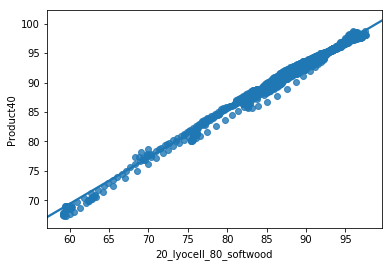

In [26]:
sns.regplot(x="20_lyocell_80_softwood", y="Product40", data=products_pc)

In [27]:
from sklearn.metrics import r2_score

r2_score(products_pc['20_lyocell_80_softwood'], products_pc['Product40'])

0.7923496823824231

From the above graph, the relationship between 40 and 20% lyocell and 80% softwood is linear and their r2 score is pretty high as well. This indicates that finding a linear relationship between the products and raw materials is the right direction to start in.

### 3.2 Correlation and Heatmap

In [28]:
corr = products_pc.corr()
corr = corr.drop(corr.columns[0:7], axis=1).reset_index()
corr = corr.drop(0) #dropping first row, wavenumber correlation

#dropping products 1 to 101 rows 
for i in np.arange(7,108,1) :      
    corr = corr.drop(products_pc.index[[i]])
corr

,index,Product1,Product10,Product100,Product101,Product11,Product12,Product13,Product14,Product15,Product16,Product17,Product18,Product19,Product2,Product20,Product21,Product22,Product23,Product24,Product25,Product26,Product27,Product28,Product29,Product3,Product30,Product31,Product32,Product33,Product34,Product35,Product36,Product37,Product38,Product39,Product4,Product40,Product41,Product42,Product43,Product44,Product45,Product46,Product47,Product48,Product49,Product5,Product50,Product51,Product52,Product53,Product54,Product55,Product56,Product57,Product58,Product59,Product6,Product60,Product61,Product62,Product63,Product64,Product65,Product66,Product67,Product68,Product69,Product7,Product70,Product71,Product72,Product73,Product74,Product75,Product76,Product77,Product78,Product79,Product8,Product80,Product81,Product82,Product83,Product84,Product85,Product86,Product87,Product88,Product89,Product9,Product90,Product91,Product92,Product93,Product94,Product95,Product96,Product97,Product98,Product99
1,15_rayon_ 85_softwood,0.993262,0.747660,0.994871,0.996226,0.993107,0.918380,0.731566,0.673967,0.728540,0.849955,0.857032,0.764172,0.994708,0.994732,0.987250,0.997276,0.990994,0.994406,0.997026,0.992523,0.997004,0.996723,0.995083,0.995519,0.992940,0.597198,0.963824,0.459927,0.997391,0.999092,0.805644,0.983650,0.996508,0.993369,0.835825,0.774970,0.995762,0.971466,0.888454,0.930313,0.998477,0.986686,0.911698,0.988500,0.847955,0.800614,0.800225,0.807023,0.993766,0.764281,0.989360,0.813110,0.673348,0.750112,0.979062,0.998361,0.996541,0.989688,0.997024,0.994900,0.998926,0.994971,0.994530,0.996323,0.996253,0.992473,0.996230,0.994905,0.659071,0.846165,0.972644,0.973159,0.680720,0.806363,0.668206,0.707465,0.837295,0.777498,0.980798,0.734750,0.980302,0.885831,0.975455,0.968852,0.781159,0.995656,0.992299,0.987129,0.862713,0.843516,0.959936,0.718388,0.989378,0.985985,0.992730,0.990024,0.990766,0.991473,0.996212,0.991032,0.995275
2,15_rayon_85_hardwood,0.988894,0.770378,0.994645,0.993729,0.988839,0.924759,0.753200,0.677222,0.751280,0.866186,0.856958,0.785602,0.989366,0.997554,0.995159,0.997013,0.994597,0.996284,0.996163,0.991892,0.994531,0.997276,0.991999,0.992841,0.989012,0.618875,0.968671,0.475764,0.994099,0.995761,0.809437,0.970716,0.996085,0.985510,0.842667,0.796505,0.987191,0.963727,0.892443,0.918518,0.992287,0.983072,0.924279,0.984219,0.867411,0.819131,0.816639,0.824440,0.988815,0.785871,0.989886,0.829943,0.671130,0.750661,0.983496,0.993390,0.993291,0.986502,0.991561,0.991873,0.995985,0.990588,0.995442,0.994588,0.992427,0.992736,0.995230,0.990691,0.684508,0.852702,0.968312,0.977267,0.641560,0.821669,0.632245,0.731973,0.852119,0.788216,0.974833,0.743505,0.976521,0.902107,0.969633,0.973769,0.798355,0.991330,0.986812,0.987354,0.846441,0.820448,0.961879,0.734199,0.983581,0.978856,0.991668,0.984323,0.988838,0.989922,0.995067,0.991181,0.993967
3,20_lyocell_80_softwood,0.989397,0.730425,0.987608,0.991876,0.991608,0.907672,0.715156,0.668832,0.711478,0.836338,0.853225,0.746859,0.993316,0.984013,0.972716,0.990025,0.980992,0.984859,0.989590,0.986759,0.991197,0.987993,0.990542,0.990797,0.990750,0.583547,0.953391,0.449322,0.990986,0.993668,0.799769,0.990585,0.988311,0.993296,0.827682,0.757246,0.996603,0.976116,0.884686,0.930603,0.994355,0.983446,0.897040,0.986357,0.830114,0.782642,0.786925,0.791209,0.990361,0.747017,0.981725,0.801198,0.667641,0.746087,0.968206,0.994815,0.992419,0.987560,0.994634,0.990196,0.993375,0.991584,0.986012,0.989841,0.992871,0.984057,0.988246,0.992014,0.640392,0.841232,0.975231,0.966329,0.728902,0.795452,0.713779,0.689088,0.826475,0.771918,0.984284,0.727154,0.979446,0.870140,0.974730,0.958581,0.768591,0.992372,0.992960,0.980579,0.884143,0.871798,0.952408,0.707769,0.988174,0.987807,0.987049,0.989106,0.986474,0.988139,0.990445,0.985637,0.990073
4,35_rayon_65_softwood,0.991420,0.755483,0.993681,0.994443,0.996080,0.920583,0.737490,0.675052,0.735138,0.856208,0.856872,0.770711,0.992307,0.995528,0.989214,0.996841,0.992113,0.994672,0.9964

C:\Users\Harshleen\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



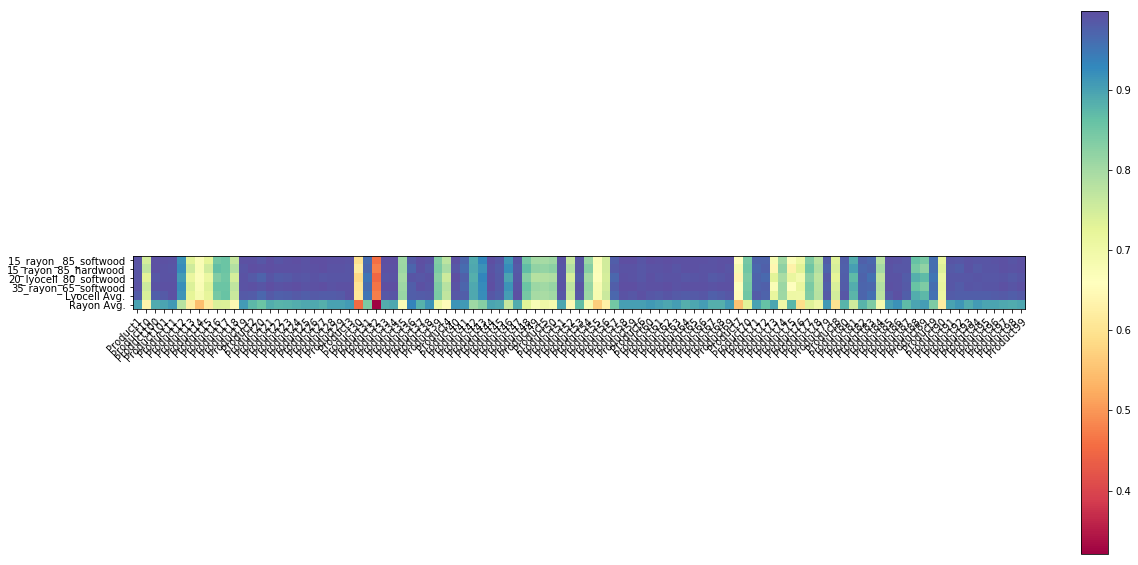

In [29]:
fig = plt.figure(figsize=(20,10))
plt.imshow(corr.iloc[:,1:].values, cmap='Spectral')

ax = fig.add_subplot(1,1,1)

#set ticks
ax.set_xticks(np.arange(0,102,1))
ax.set_yticks(np.arange(0,11,1))

ax.set_xticklabels(corr.columns[1:])
ax.set_yticklabels(corr['index'].values)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.colorbar(plt.imshow(corr.iloc[:,1:].values, cmap='Spectral'))

plt.show()

Product 32 contains the least ammount of any of the raw materials, followed by product 30. This could mean product 30 and 32 are not made from the specified raw materials. Which is a validate, reason because according to the fibre analysis, the products could be made from materials other than softwood, hardwood, lyocell or rayon.

Also, according to the heat map,15_rayon_85_softwood, 15_rayon_85_hardwood, 20_lyocell_80_softwood, 35_rayon_65_softwood and Lyocell Avg. is present in all products. However, the high correlation doesn't indicate the amount of raw materials present in the product.

## 4. Multiple Linear regression

I will try out a linear regression for a few of the products first and evaluate the results.

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
#creating a new dataframe for the pure composition only from dataframe products_pc, which where merged on matching wave numbers
#pc_new will be the x-value input for the regression model

pc_new = products_pc[['15_rayon_ 85_softwood','15_rayon_85_hardwood','20_lyocell_80_softwood','35_rayon_65_softwood','Lyocell Avg.',
           'Rayon Avg.']].copy()
pc_new.head()

,15_rayon_ 85_softwood,15_rayon_85_hardwood,20_lyocell_80_softwood,35_rayon_65_softwood,Lyocell Avg.,Rayon Avg.
0,79.227840,85.421491,68.829563,82.304029,85.160899,58.994464
1,79.795160,85.772351,68.331339,81.722157,84.801289,59.250458
2,80.200500,87.450270,68.999422,81.350257,84.911213,59.113393
3,78.951970,88.221001,69.911201,81.861329,85.392020,59.343860
4,77.914234,87.060120,70.290681,82.870374,85.601165,59.854561


### 4.1 Linear regression for product 1 (0.9 correlation with all pure compositions ) and Product 32 (0.5-0.0 correlation with all pure compositions)

In [33]:
x = sm.add_constant(pc_new)
y = products_pc['Product1'].values

regression_model = sm.OLS(y,x).fit()
display(regression_model.summary()) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.563e+04
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        08:56:12   Log-Likelihood:                -1907.7
No. Observations:                1798   AIC:                             3829.
Df Residuals:                    1791   BIC:                             3868.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.6033      3.035     -1.846      0.065     -11.557       0.350
15_rayon_ 85_softwood      0.4449      0.091      4.885      0.000       0.266       0.623
15_rayon_85_hardwood       0.6599      0.072      9.124      0.000       0.518       0.802
20_lyocell_80_softwood     0.4071      0.052      7.857      0.000       0.305       0.509
35_rayon_65_softwood       0.1750      0.093      1.876      0.061      -0.008       0.358
Lyocell Avg.              -0.6690      0.055    -12.071      0.000      -0.778      -0.560
Rayon Avg.                 0.0391      0.007      5.789      0.000       0.026       0.052
==============================================================================
Omnibus:                      151.309   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.039
Skew:                           0.262   Prob(JB):                    2.38e-150
Kurtosis:                       5.987   Cond. No.                     4.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
x = sm.add_constant(pc_new)
y = products_pc['Product32'].values

regression_model = sm.OLS(y,x).fit()
display(regression_model.summary()) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     179.2
Date:                Fri, 14 Dec 2018   Prob (F-statistic):          8.31e-179
Time:                        08:56:12   Log-Likelihood:                -3850.1
No. Observations:                1798   AIC:                             7714.
Df Residuals:                    1791   BIC:                             7753.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -39.4847      8.941     -4.416      0.000     -57.020     -21.949
15_rayon_ 85_softwood     -0.3740      0.268     -1.394      0.163      -0.900       0.152
15_rayon_85_hardwood       1.2962      0.213      6.084      0.000       0.878       1.714
20_lyocell_80_softwood    -0.0832      0.153     -0.545      0.586      -0.383       0.216
35_rayon_65_softwood      -1.6546      0.275     -6.021      0.000      -2.193      -1.116
Lyocell Avg.               2.3852      0.163     14.611      0.000       2.065       2.705
Rayon Avg.                -0.2132      0.020    -10.713      0.000      -0.252      -0.174
==============================================================================
Omnibus:                      747.811   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3540.756
Skew:                          -1.955   Prob(JB):                         0.00
Kurtosis:                       8.654   Cond. No.                     4.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the R-squared scores for both the products, it is apparent that product 1's model is able to fit 98% of the data points. Whereas, product 32's model performs very poorly, only being able to fit 37% of the data points. This might indicate that product 32 might contain raw materials not specified in our list of pure compositions. As well as, the heat map gave a good indication of the relationship between the products and the raw materials.

Also, the condition numbers for both products is very large. So, any minor change in the input data could change the results of the analysis. Comparing the coefficient values generated by the model for product 1 to its' fibre analysis, the model indictes there's 45% of softwood. Whereas in actuality, there's 70% of softwood. In order to combat that, I will employ a lasso regression.

### 4.2 L1 regression

In [34]:
from sklearn.linear_model import Lasso

#### 4.2.1 Trying L1 for product 1

In [35]:
x = pc_new 
y = products_pc['Product1'].values

#positive=True since we do not want any negative coefficient values for the raw materials since that does not make any sense.
lasso_reg = Lasso(alpha=1, fit_intercept=False, normalize=True, max_iter=10000, positive=True)
lasso_reg.fit(x,y)

print(lasso_reg.score(x,y)) 
print(lasso_reg.coef_) 

0.982471960724892
[0.73977968 0.         0.22348822 0.         0.         0.03710577]


The R-squared score is very good. The model predicts that raw material 1: 15% rayon & 85% softwood makes up 74% of product 1, compared to 70% from the fibre analysis. But this lasso regression model predicted that 0% of lyocell makes up product 1, but according to the fibre analysis, lyocell makes up 28% of it. In order to truely understand how big or small this 28% affects product 1, we would need to know the weight of the product.

#### 4.2.1.1 Plotting predicted equation with acutal data with seaborn

In [36]:
trace1 = go.Scatter(
    y = products_pc['Product1'], 
    x = products_pc['WaveNumber'], 
    name = 'Product 1 Actual'
)

trace2 = go.Scatter(
    y = ((0.73977968) * pc_new['15_rayon_ 85_softwood'].values) + ((0.22348822) * pc_new['20_lyocell_80_softwood'].values) 
+ (( 0.03710577) * pc_new['Rayon Avg.'].values), 
    x = products_pc['WaveNumber'],
    name = 'Product 1 Predicted'
)
layout = dict(
    title = 'Product 1 Actual vs. Product 1 Predicted',
    xaxis = dict(title = 'WaveNumber'),
    yaxis = dict(title = '% transmitted')
)

data = [trace1, trace2]

fig = dict(data = data, layout = layout)

pyo.plot(fig)

'file://C:\\Users\\Harshleen\\Downloads\\temp-plot.html'

By observing the graph, we can say that the predicted model fits really well with the actual.

#### 4.2.2 Finding the coefficent of all products by using a loop

In [37]:
x = pc_new 

products = []
score = []
lasso_coef = []

for i in np.arange(1,102,1):
    y = products_pc[f'Product{i}']

    lasso_reg = Lasso(alpha=1, fit_intercept=False, normalize=True, max_iter=10000, positive=True)
    lasso_reg.fit(x,y)

    products.append(float(i))
    score.append(lasso_reg.score(x,y))
    lasso_coef.append(lasso_reg.coef_)
    
lasso_results = pd.DataFrame(
    {'Products':products,
     'Score':score,
     'Coef':lasso_coef
    })

In [38]:
lasso_results

,Products,Score,Coef
0,1.0,0.982472,"[0.7397796813795775, 0.0, 0.2234882212160135, ..."
1,2.0,0.990476,"[0.2618702072445784, 0.744796447688859, 0.0, 0..."
2,3.0,0.956958,"[0.0, 0.9829912531477432, 0.0, 0.0, 0.01226122..."
3,4.0,0.448982,"[0.0, 0.9968161395861524, 0.0, 0.0, 0.0, 0.0]"
4,5.0,0.660242,"[0.157365744738163, 0.8246917950797451, 0.0, 0..."
5,6.0,0.725215,"[0.0, 1.0074074538700946, 0.0, 0.0, 0.0, 0.0]"
6,7.0,0.197047,"[0.0, 1.0029122100303887, 0.0, 0.0, 0.0, 0.0]"
7,8.0,-0.878289,"[0.0, 0.9907071492307027, 0.0, 0.0, 0.0, 0.0]"
8,9.0,0.912916,"[0.04451566109787365, 0.9445468499130418, 0.0,..."
9,10.0,0.147752,"[0.0, 1.003822216798151, 0.0, 0.0, 0.0, 0.0]"


In [39]:
#sort score results from min to max, there's some negative scores
sorted_lasso = lasso_results.sort_values(by=['Score']).reset_index(inplace=False).drop(columns={'index'})
sorted_lasso

,Products,Score,Coef
0,46.0,-0.889425,"[0.0, 1.0112162860293006, 0.0, 0.0, 0.0, 0.0]"
1,8.0,-0.878289,"[0.0, 0.9907071492307027, 0.0, 0.0, 0.0, 0.0]"
2,56.0,-0.674250,"[0.0, 0.9917110073613655, 0.0, 0.0, 0.0, 0.0]"
3,14.0,-0.534338,"[0.0, 0.990376611268862, 0.0, 0.0, 0.0, 0.0]"
4,32.0,-0.429836,"[0.0, 0.9890847380927202, 0.0, 0.0, 0.0, 0.0]"
5,30.0,-0.385965,"[0.0, 1.003659915353073, 0.0, 0.0, 0.0, 0.0]"
6,49.0,-0.023450,"[0.0, 1.0084884219089685, 0.0, 0.0, 0.0, 0.0]"
7,55.0,0.009863,"[0.0, 0.9721452561425317, 0.0, 0.0, 0.0, 0.0]"
8,10.0,0.147752,"[0.0, 1.003822216798151, 0.0, 0.0, 0.0, 0.0]"
9,7.0,0.197047,"[0.0, 1.0029122100303887, 0.0, 0.0, 0.0, 0.0]"


The R-squared scores for products 8, 14, 30, 32, 46, 49 and 56 are negative, which means the model didn't follow the trend of the data points. So, it fit worse than a horizontal line. Predicted accuractely for most.

In [40]:
lasso_coef = pd.DataFrame(lasso_coef)
#rename columns
lasso_coef = lasso_coef.rename(columns={0:'15_rayon_ 85_softwood', 1:'15_rayon_85_hardwood', 2:'20_lyocell_80_softwood',
                                        3:'35_rayon_65_softwood', 4:'Lyocell Avg.',5:'Rayon Avg.'})
# add products columns
idx = 0
#lasso_coef.insert(loc=idx, column='Products', value=lasso_results['Products'])

lasso_coef

,15_rayon_ 85_softwood,15_rayon_85_hardwood,20_lyocell_80_softwood,35_rayon_65_softwood,Lyocell Avg.,Rayon Avg.
0,0.739780,0.000000,0.223488,0.0,0.000000e+00,0.037106
1,0.261870,0.744796,0.000000,0.0,0.000000e+00,0.000000
2,0.000000,0.982991,0.000000,0.0,1.226123e-02,0.000000
3,0.000000,0.996816,0.000000,0.0,0.000000e+00,0.000000
4,0.157366,0.824692,0.000000,0.0,0.000000e+00,0.000000
5,0.000000,1.007407,0.000000,0.0,0.000000e+00,0.000000
6,0.000000,1.002912,0.000000,0.0,0.000000e+00,0.000000
7,0.000000,0.990707,0.000000,0.0,0.000000e+00,0.000000
8,0.044516,0.944547,0.000000,0.0,7.945690e-04,0.000000
9,0.000000,1.003822,0.000000,0.0,0.000000e+00,0.000000


## 4.3.1 Highest Score: Plotting Product 62 Predicted vs. Actual

In [61]:
trace1 = go.Scatter(
    y = products_pc['Product62'], 
    x = products_pc['WaveNumber'], 
    name = 'Product 62 Actual'
)

trace2 = go.Scatter(
    y = ((0.762456) * pc_new['15_rayon_ 85_softwood'].values) + ((0.237080) * pc_new['15_rayon_85_hardwood'].values),  
    x = products_pc['WaveNumber'], 
    name = 'Product 62 Predicted'
)
layout = dict(
    title = 'Product 62 Actual vs. Product 62 Predicted',
    xaxis = dict(title = 'WaveNumber'),
    yaxis = dict(title = '% transmitted')
)

data = [trace1, trace2]

fig = dict(data = data, layout = layout)

pyo.plot(fig)

'file://C:\\Users\\Harshleen\\Downloads\\temp-plot.html'

## 4.3.2 Lowest Score: Plotting Product 46 Predicted vs. Actual

In [59]:
trace1 = go.Scatter(
    y = products_pc['Product46'], 
    x = products_pc['WaveNumber'], 
    name = 'Product 46 Actual'
)

trace2 = go.Scatter(
    y = ((1.011216) * pc_new['15_rayon_85_hardwood'].values),  
    x = products_pc['WaveNumber'], 
    name = 'Product 46 Predicted'
)
layout = dict(
    title = 'Product 46 Actual vs. Product 46 Predicted',
    xaxis = dict(title = 'WaveNumber'),
    yaxis = dict(title = '% transmitted')
)

data = [trace1, trace2]

fig = dict(data = data, layout = layout)

pyo.plot(fig)

'file://C:\\Users\\Harshleen\\Downloads\\temp-plot.html'

The predicted product 32 looks similar to product 1 actual and predicted. This could mean, this type of model works well with products that have similar wave numbers as product 1.

## 4.4  Final Results

In [41]:
data = ['1','1','1','1','1','1','1','1','1','1','1',
                '1','1','1','1','1','1','1','1','1','1','1','1','1',
                '1','1','1','1','1','1','1','1','1','1','1','1','1',
                '1','1','1','1','1','1','1','1','1','1','1','1','1',
                '1','1','1','1','1','1','1','1','1','1','1','1','1',
                '1','1','1','1','1','1','1','1','1','0','1','0','1',
                '1','1','1','1','1','1','1','1','1','1','1','0','0',
                '1','1','1','1','1','1','1','1','1','1','1','1']

In [52]:
#input 'data' into new data frame called 'flushability_results'
flushability_results = pd.DataFrame(data)
flushability_results = flushability_results.rename(columns={0:'Flushable'})
flushability_results

,Flushable
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [56]:
#creating a copy of the columns 'Product' and 'Pass Rate' called actual_predict and merging  that to flushability_results
actual_predict = product_label[['Product', 'Pass Rate']].copy()
actual_predict = actual_predict.merge(flushability_results, how='outer',left_index=True, right_index=True)
actual_predict

,Product,Pass Rate,Flushable
0,1.0,0.0,1
1,2.0,0.0,1
2,3.0,0.0,1
3,4.0,0.0,1
4,5.0,0.0,1
5,6.0,0.0,1
6,7.0,0.0,1
7,8.0,0.0,1
8,9.0,0.0,1
9,10.0,0.0,1


In [58]:
actual_predict

,Product,Pass Rate,Flushable
0,1.0,0.0,1
1,2.0,0.0,1
2,3.0,0.0,1
3,4.0,0.0,1
4,5.0,0.0,1
5,6.0,0.0,1
6,7.0,0.0,1
7,8.0,0.0,1
8,9.0,0.0,1
9,10.0,0.0,1


Comparing the Pass Rate column with the Flushable column, the model did not do a good of predicting the flushability. Some of the reasons could be because there wasn't enough data. Since I got this data from a university professor, the data set was small to beginning with. About 1500 data points for every product. For a typical data science project, the size of the data set is in the range of hundreds of thousands. The percent transmittance and wave lengths were very similar to each other. So, the model could predict some products really well and others not so much. Also, the data didn't account for the moisture in the wipes. So, this alters the percent transmittance recorded by the IR scan.

## 5. KMeans

In [67]:
from sklearn.cluster import KMeans

In [68]:
#make new table, transpose it, and turn into numpy array
products = pd.DataFrame(products_pc.iloc[0:,7:108])

In [69]:
#transposed, so each array in the set of arrays is one product
products = products.T.values
products

array([[77.123386  , 76.216194  , 75.684007  , ..., 97.188014  ,
        97.214547  , 97.241564  ],
       [91.566304  , 91.547435  , 90.859578  , ..., 98.100627  ,
        98.290486  , 98.292686  ],
       [82.934354  , 82.876539  , 82.81621   , ..., 97.89257333,
        97.92139567, 97.950218  ],
       ...,
       [81.602732  , 81.48630333, 81.38595967, ..., 97.741712  ,
        97.767782  , 97.793852  ],
       [76.945439  , 76.56874267, 76.40070033, ..., 97.35438767,
        97.33071133, 97.307035  ],
       [79.198017  , 78.96304733, 78.85168567, ..., 97.49883633,
        97.52667067, 97.554505  ]])

### 5.1 KMeans without Labels

#### 5.1.1 Finding the optimal amount of clusters

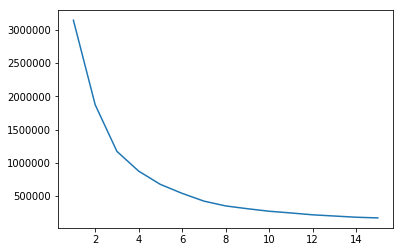

In [70]:
x = products #input is 101 products
inertia_range = np.arange(1,16,1)

inertia_results = []

for i in inertia_range:
    kmeans_model = KMeans(n_clusters=i, random_state=0).fit(x)
    inertia_results.append(kmeans_model.inertia_)
    
plt.plot(inertia_range, inertia_results)

#### 5.1.2 n_clusters = 6

In [71]:
x = products #input is 101 products

labels = []

kmeans_model = KMeans(n_clusters=6, random_state=0).fit(x)

labels.append(kmeans_model.labels_)

In [72]:
labels_df = pd.DataFrame(labels)
labels_df = labels_df.T
labels_df.head()

,0
0,5
1,3
2,1
3,1
4,3


### 5.2 Creating a Data Frame for Each Cluster 

In [73]:
product_names = pd.DataFrame(products_pc.iloc[0:,7:108].columns)
product_names = product_names.rename(columns={0:1})
product_names.head()

,1
0,Product1
1,Product10
2,Product100
3,Product101
4,Product11


In [74]:
product_cluster_groups = pd.concat([product_names, labels_df], axis=1, sort=False)
product_cluster_groups = product_cluster_groups.rename(columns={1:'Products', 0:'Cluster groups (0-7)'})
product_cluster_groups.head()

,Products,Cluster groups (0-7)
0,Product1,5
1,Product10,3
2,Product100,1
3,Product101,1
4,Product11,3


In [75]:
product_cluster_groups = product_cluster_groups.sort_values(by=['Cluster groups (0-7)'])
product_cluster_groups = product_cluster_groups.reset_index(inplace=False).drop(columns={'index'})
product_cluster_groups

,Products,Cluster groups (0-7)
0,Product74,0
1,Product81,0
2,Product84,0
3,Product48,0
4,Product78,0
5,Product18,0
6,Product5,0
7,Product15,0
8,Product50,0
9,Product13,0


#### 5.2.1 Invesgating Clusters

In [76]:
d = []
e = []
f = []

for i in np.arange(0,14,1):
    j = product_cluster_groups.iat[i,0][7:]
    j = float(j)
    product_index = product_label[product_label['Product']==j].index.values.astype(int)[0]
    category_index = product_label.iat[product_index,1]
    score_index = lasso_results.iat[product_index-1,1]
    
    d.append(product_index)
    e.append(category_index)
    f.append(score_index)

cluster_0 = pd.DataFrame({'Product':d,'Product Category':e,'Score':f})
cluster_0

,Product,Product Category,Score
0,73,Cleansing Wipes,0.787239
1,80,Cleansing Wipes,0.959965
2,83,Cleansing Wipes,0.942600
3,47,Cleansing Cloth,0.931981
4,77,Cleansing Wipes,0.702379
5,17,Baby Wipes,0.693244
6,4,Baby Wipes,0.448982
7,14,Baby Wipes,-0.534338
8,49,Cleansing Cloth,-0.023450
9,12,Baby Wipes,0.522120


In [80]:
d = []
e = []
f = []

for i in np.arange(14,50,1):
    j = product_cluster_groups.iat[i,0][7:]
    j = float(j)
    product_index = product_label[product_label['Product']==j].index.values.astype(int)[0]
    category_index = product_label.iat[product_index,1]
    score_index = lasso_results.iat[product_index-1,1]
    
    d.append(product_index)
    e.append(category_index)
    f.append(score_index)

cluster_1 = pd.DataFrame({'Product':d,'Product Category':e,'Score':f})
cluster_1

,Product,Product Category,Score
0,66,Cleansing Wipes,0.990219
1,69,Cleansing Wipes,0.985843
2,68,Cleansing Wipes,0.992310
3,67,Cleansing Wipes,0.983880
4,70,Cleansing Wipes,0.724063
5,65,Cleansing Wipes,0.988338
6,98,Paper Towels,0.977683
7,44,Cleaning Wipes,0.991813
8,64,Cleansing Wipes,0.990876
9,71,Cleansing Wipes,0.947078


In [81]:
d = []
e = []
f = []

for i in np.arange(50,53,1):
    j = product_cluster_groups.iat[i,0][7:]
    j = float(j)
    product_index = product_label[product_label['Product']==j].index.values.astype(int)[0]
    category_index = product_label.iat[product_index,1]
    score_index = lasso_results.iat[product_index-1,1]
    
    d.append(product_index)
    e.append(category_index)
    f.append(score_index)

cluster_2 = pd.DataFrame({'Product':d,'Product Category':e,'Score':f})
cluster_2

,Product,Product Category,Score
0,72,Cleansing Wipes,0.952391
1,88,Dog Waste Bags,0.820707
2,74,Cleansing Wipes,0.661160


In [82]:
d = []
e = []
f = []

for i in np.arange(53,81,1):
    j = product_cluster_groups.iat[i,0][7:]
    j = float(j)
    product_index = product_label[product_label['Product']==j].index.values.astype(int)[0]
    category_index = product_label.iat[product_index,1]
    score_index = lasso_results.iat[product_index-1,1]
    
    d.append(product_index)
    e.append(category_index)
    f.append(score_index)

cluster_3 = pd.DataFrame({'Product':d,'Product Category':e,'Score':f})
cluster_3

,Product,Product Category,Score
0,7,Baby Wipes,0.197047
1,8,Baby Wipes,-0.878289
2,6,Baby Wipes,0.725215
3,5,Baby Wipes,0.660242
4,52,Cleansing Wipes,0.611106
5,55,Cleansing Wipes,0.009863
6,1,Baby Wipes,0.982472
7,19,Bathroom Tissue,0.987695
8,21,Bathroom Tissue,0.994575
9,13,Baby Wipes,0.557135


In [85]:
d = []
e = []
f = []

for i in np.arange(81,82,1):
    j = product_cluster_groups.iat[i,0][7:]
    j = float(j)
    product_index = product_label[product_label['Product']==j].index.values.astype(int)[0]
    category_index = product_label.iat[product_index,1]
    score_index = lasso_results.iat[product_index-1,1]
    
    d.append(product_index)
    e.append(category_index)
    f.append(score_index)

cluster_4 = pd.DataFrame({'Product':d,'Product Category':e,'Score':f})
cluster_4

,Product,Product Category,Score
0,89,Dog Waste Bags,0.805633


In [86]:
d = []
e = []
f = []

for i in np.arange(82,101,1):
    j = product_cluster_groups.iat[i,0][7:]
    j = float(j)
    product_index = product_label[product_label['Product']==j].index.values.astype(int)[0]
    category_index = product_label.iat[product_index,1]
    score_index = lasso_results.iat[product_index-1,1]
    
    d.append(product_index)
    e.append(category_index)
    f.append(score_index)

cluster_5 = pd.DataFrame({'Product':d,'Product Category':e,'Score':f})
cluster_5

,Product,Product Category,Score
0,87,Dog Waste Bags,0.972358
1,90,Facial Tissue,0.401162
2,93,Facial Tissue,0.980020
3,94,Facial Tissue,0.978152
4,92,Facial Tissue,0.965518
5,91,Facial Tissue,0.976257
6,25,Bathroom Tissue,0.981144
7,81,Cleansing Wipes,0.788296
8,79,Cleansing Wipes,0.967225
9,78,Cleansing Wipes,0.600702


The results of the clusters don't present any patterns. Such as cluster 2 and 4 both have dog waste bags, but cluster 4 could have in cluster 2 according to its labels. But the dog bag from cluster 4, could have been made from different raw materials not specificed in the list of raw materials, as evident from the fibre analysis.

Many of the cleaning wipes were clustered together in different groups, indicating that each type of wipe is made of varying materials.

## 6. Conclusion

From this project I have learned that having a large data set is crucial for any data science investigation. Editing and pre-processing took the most amount of time for this project. But this was benefical since when I created the model, it only took a few lines to create it. Also, as I started to explore the data, I learned the question I set out to answer might have change according to the data I have available.

For future works, I would like to obtain more data, such as more than one scan for each product. Also, to exlpore the data with other types of models.